<a href="https://colab.research.google.com/github/ttadesusi/Artificial-Intelligence-Projects/blob/main/Copy_of_Potential_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POTENTIAL CUSTOMER PREDICTION**

---


## **DATA AQUISITION**

In [1]:
# import dataframe and numpy package
import pandas as pd
import numpy as np

In [2]:
# read data from source
data_link  = "https://drive.google.com/uc?id=1Pl6qEBYtxwtSjcNhMLT70AwOSLveyrjE"

transaction_df = pd.read_excel(data_link, 'Transactions') 
newcustomer_df = pd.read_excel(data_link, 'NewCustomerList')

In [3]:
# display top 5 rows of transactions data
transaction_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,age,age_group,job_industry_category,wealth_segment,owns_car,tenure,postcode,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,product_age
0,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10,2003-09-09,20
1,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,431.33,2011-03-16,12
2,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,57.73,2002-03-22,21
3,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,75.75,1991-08-05,32
4,1,Female,93,70,70above,Health,Mass Customer,Yes,11.0,2016.0,...,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2005-08-09,18


In [4]:
# display top 5 rows of new customer list data
newcustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,...,owns_car,tenure,address,postcode,remoteness_area,state,country,property_valuation,Rank,Value
0,Abbie,Oldman,Male,82,1983-11-26,40,40-44,NaN,Health,High Net Worth,...,Yes,5,4 North Drive,2168,Major Cities of Australia,NSW,Australia,8,212,1.136875
1,Abigale,Sives,Female,48,1963-12-13,60,60-64,VP Marketing,Health,Affluent Customer,...,Yes,14,2 Glendale Center,4207,Major Cities of Australia,QLD,Australia,4,230,1.109375
2,Abner,Fraschetti,Male,33,1986-01-23,37,35-39,Staff Scientist,Argiculture,Affluent Customer,...,No,13,67 Northport Avenue,3805,Major Cities of Australia,VIC,Australia,7,166,1.175000
3,Adolpho,Bellerby,Male,46,1944-10-25,79,70above,VP Sales,Financial Services,High Net Worth,...,Yes,13,2763 Buhler Circle,4305,Major Cities of Australia,QLD,Australia,4,486,0.875000
4,Adria,Van den Velde,Female,39,1978-07-10,45,45-49,Nuclear Power Engineer,Manufacturing,Affluent Customer,...,Yes,9,6030 Becker Plaza,2261,Major Cities of Australia,NSW,Australia,7,810,0.587500


## **DATA EXPLORATION AND CLEANING**

In [5]:
# transactions data info
print(transaction_df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", transaction_df.shape[0], "and", "Number of columns (attributes) is" , transaction_df.shape[1])  # Number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19800 non-null  int64         
 1   gender                               19800 non-null  object        
 2   past_3_years_bike_related_purchases  19800 non-null  int64         
 3   age                                  19800 non-null  int64         
 4   age_group                            19800 non-null  object        
 5   job_industry_category                16602 non-null  object        
 6   wealth_segment                       19800 non-null  object        
 7   owns_car                             19800 non-null  object        
 8   tenure                               19362 non-null  float64       
 9   postcode                             19773 non-null  float64       
 10  remoteness

In [6]:
# new customer list data info
print(newcustomer_df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", newcustomer_df.shape[0], "and", "Number of columns (attributes) is" , newcustomer_df.shape[1])  # Number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  1000 non-null   datetime64[ns]
 5   age                                  1000 non-null   int64         
 6   age_group                            1000 non-null   object        
 7   job_title                            894 non-null    object        
 8   job_industry_category                835 non-null    object        
 9   wealth_segment                       1000 non-null   object        
 10  deceased_indi

### Fill Missing Values for Transaction and New Customer List

In [7]:
# transactions data: Fill missing values with the mean for continuous columns
for col in transaction_df.select_dtypes(include=['int', 'float']).columns:
    transaction_df[col].fillna(transaction_df[col].mean().round(), inplace=True)

# transactions data: Fill missing values with the mode for categorical columns
for col in transaction_df.select_dtypes(include='object').columns:
    transaction_df[col].fillna(transaction_df[col].mode()[0], inplace=True)

print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19800 non-null  int64         
 1   gender                               19800 non-null  object        
 2   past_3_years_bike_related_purchases  19800 non-null  int64         
 3   age                                  19800 non-null  int64         
 4   age_group                            19800 non-null  object        
 5   job_industry_category                19800 non-null  object        
 6   wealth_segment                       19800 non-null  object        
 7   owns_car                             19800 non-null  object        
 8   tenure                               19800 non-null  float64       
 9   postcode                             19800 non-null  float64       
 10  remoteness

In [8]:
# new customer list data: Fill missing values with the mean for continuous columns
for col in newcustomer_df.select_dtypes(include=['int', 'float']).columns:
    newcustomer_df[col].fillna(newcustomer_df[col].mean().round(), inplace=True)

# new customer list data: Fill missing values with the mode for categorical columns
for col in newcustomer_df.select_dtypes(include='object').columns:
    newcustomer_df[col].fillna(newcustomer_df[col].mode()[0], inplace=True)

newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  1000 non-null   datetime64[ns]
 5   age                                  1000 non-null   int64         
 6   age_group                            1000 non-null   object        
 7   job_title                            1000 non-null   object        
 8   job_industry_category                1000 non-null   object        
 9   wealth_segment                       1000 non-null   object        
 10  deceased_indi

## **DATA DESCRIPTIVE STATISTICS**

In [9]:
# transaction summary statistics for numerical values
transaction_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,19800.0,1738.795758,1011.209941,1.00,858.00,1738.00,2615.00,3500.00
past_3_years_bike_related_purchases,19800.0,48.799192,28.591006,0.00,24.00,48.00,73.00,99.00
age,19800.0,45.883434,12.484853,21.00,37.00,46.00,55.00,92.00
tenure,19800.0,10.692626,5.613048,1.00,6.00,11.00,15.00,22.00
postcode,19800.0,2988.894394,850.594333,2000.00,2200.00,2768.00,3754.00,4883.00
property_valuation,19800.0,7.516061,2.823771,1.00,6.00,8.00,10.00,12.00
product_id,19800.0,45.822879,30.566954,0.00,18.00,45.00,72.00,100.00
transaction_id,19800.0,9993.328333,5776.489389,1.00,4987.75,9994.50,14999.25,20000.00
list_price,19800.0,1108.088981,582.763905,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19800.0,556.068047,405.976881,7.21,215.14,507.58,795.10,1759.85


In [10]:
# summary statistics for categorical values
for col in transaction_df.select_dtypes(include='object').columns:
    print(f"{col}:\n{transaction_df[col].value_counts()}\n")

gender:
Female         9921
Male           9433
Undisclosed     446
Name: gender, dtype: int64

age_group:
45-49      4664
25-29      2020
40-44      1994
50-54      1946
35-39      1912
55-59      1798
60-64      1679
30-34      1487
65-69      1468
18-24       683
70above     149
Name: age_group, dtype: int64

job_industry_category:
Manufacturing         7174
Financial Services    3841
Health                3073
Retail                1746
Property              1286
IT                    1068
Entertainment          694
Argiculture            566
Telecommunications     352
Name: job_industry_category, dtype: int64

wealth_segment:
Mass Customer        9944
High Net Worth       5046
Affluent Customer    4810
Name: wealth_segment, dtype: int64

owns_car:
Yes    9969
No     9831
Name: owns_car, dtype: int64

remoteness_area:
Major Cities of Australia    16260
Inner Regional Australia      2608
Outer Regional Australia       862
Remote Australia                59
Very Remote Australia     

## **DATA DISTRIBUTION**

In [11]:
transaction_df['online_order'].value_counts()

True     10097
False     9703
Name: online_order, dtype: int64

data skewness:
 age                                    0.026301
past_3_years_bike_related_purchases    0.056905
property_valuation                    -0.643160
product_age                            0.115768
dtype: float64 

data kurtosis:
 age                                   -0.694647
past_3_years_bike_related_purchases   -1.176509
property_valuation                    -0.320725
product_age                           -1.230650
dtype: float64


<Axes: >

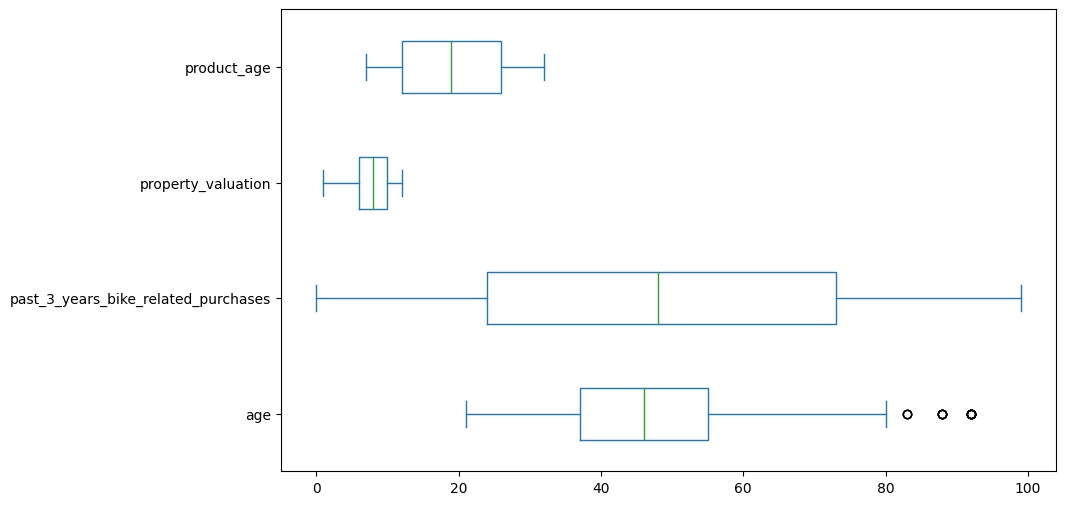

In [12]:
# numeric variables distibution
numeric_var1 = transaction_df[['age','past_3_years_bike_related_purchases','property_valuation','product_age']]
print('data skewness:\n',numeric_var1.skew(),'\n')
print('data kurtosis:\n',numeric_var1.kurtosis())
numeric_var1.plot.box(figsize=(10,6), vert = False, grid = False)

data skewness:
 list_price      -0.126816
standard_cost    0.864009
profit           0.848548
dtype: float64 

data kurtosis:
 list_price      -1.082757
standard_cost    0.286700
profit          -0.408221
dtype: float64


<Axes: >

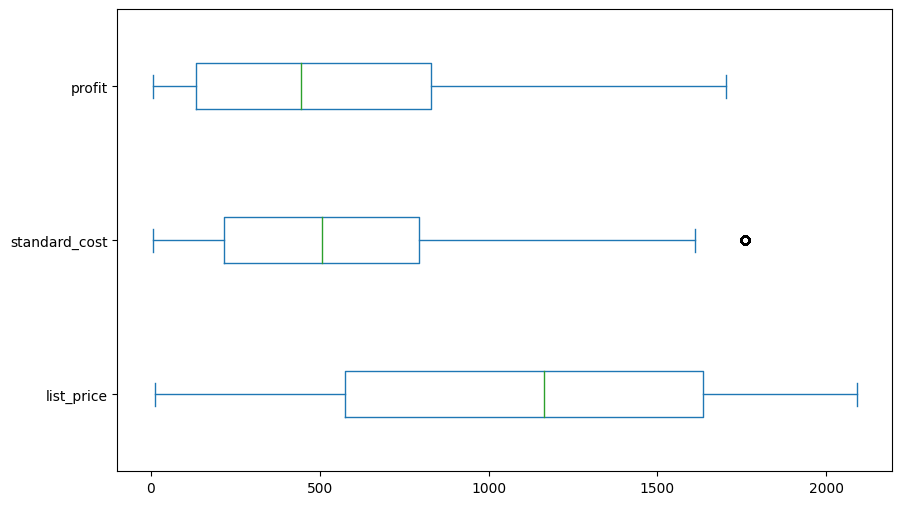

In [13]:
# numeric variables distibution
numeric_var2 = transaction_df[['list_price',	'standard_cost',	'profit']]
print('data skewness:\n',numeric_var2.skew(),'\n')
print('data kurtosis:\n',numeric_var2.kurtosis())
numeric_var2.plot.box(figsize=(10,6), vert = False, grid = False)

## **DATA VISUALIZATION**

In [14]:
# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, 'Months')]

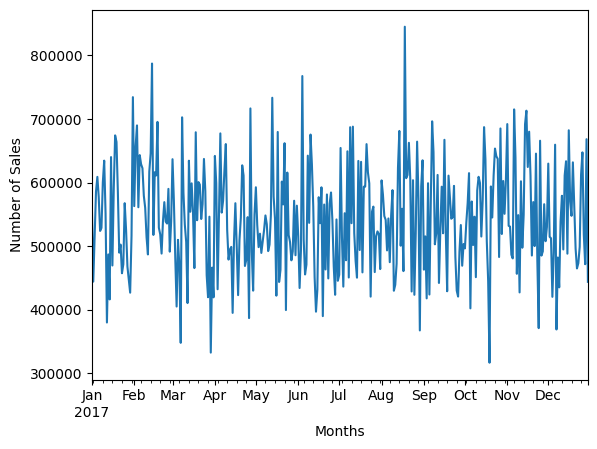

In [15]:
# visualize number sales according to month of transaction
ax=transaction_df.groupby('transaction_date').transaction_id.sum().plot(kind='line')
ax.set(ylabel='Number of Sales', xlabel='Months') 

[Text(0, 0.5, 'Brand'), Text(0.5, 0, 'Number of Sales')]

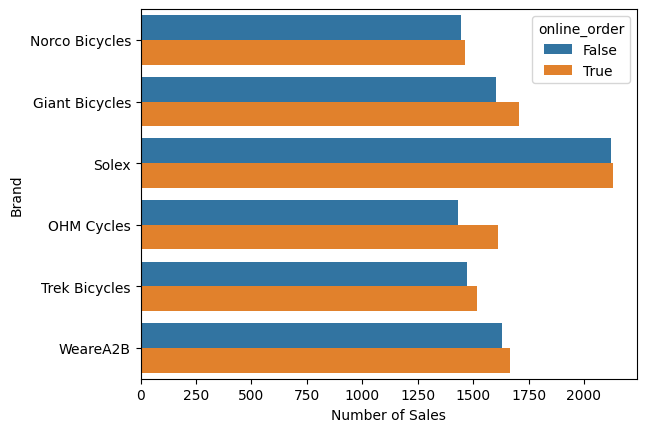

In [16]:
# visualize brand according to number of sales
ax=sns.barplot(x='transaction_id', y='brand', data=transaction_df, estimator='count_nonzero', hue='online_order')
ax.set(ylabel='Brand', xlabel='Number of Sales') 

[Text(0, 0.5, 'Brand'), Text(0.5, 0, 'Profit ($)')]

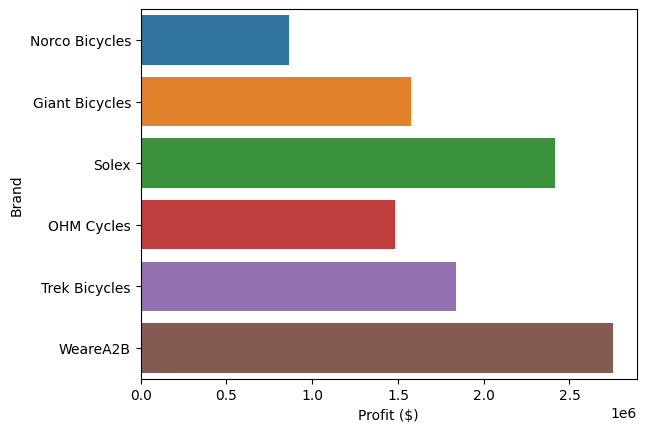

In [17]:
# visualize brand according to profit generated
ax=sns.barplot(x='profit', y='brand', data=transaction_df, estimator='sum', errorbar=('ci', False))
ax.set(ylabel='Brand', xlabel='Profit ($)')

#transaction_df.groupby('brand').profit.sum().plot(kind='barh')

[Text(0, 0.5, 'profit ($)'), Text(0.5, 0, 'Brand')]

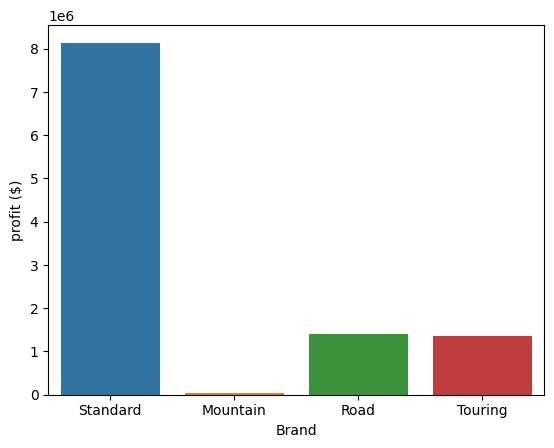

In [18]:
# visualize product line according to profit
ax=sns.barplot(x='product_line', y='profit', data=transaction_df, estimator='sum', errorbar=('ci', False))
ax.set(ylabel='profit ($)', xlabel='Brand') 

[Text(0, 0.5, 'Age Group'), Text(0.5, 0, 'Number of Sales')]

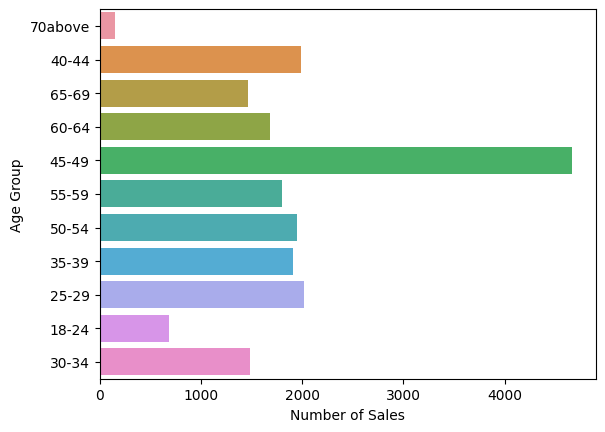

In [19]:
# visualize number of sales according to customer gender
ax=ax=sns.barplot(x='transaction_id', y='age_group', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Age Group', xlabel='Number of Sales')

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, 'Gender')]

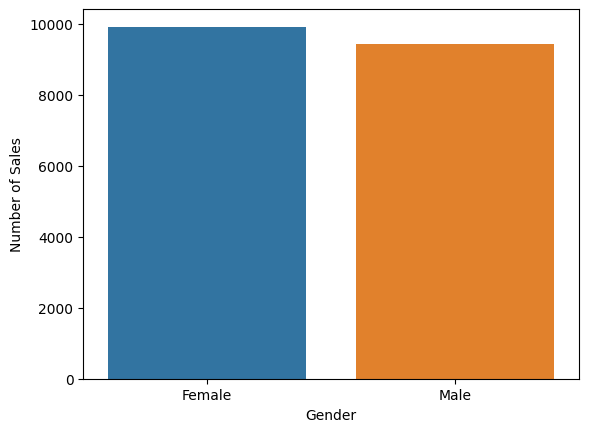

In [20]:
# visualize number sales according to customer gender and wealth segment
ax=sns.barplot(x='gender', y='transaction_id', data=transaction_df[transaction_df.gender!='Undisclosed'], estimator='count_nonzero') 
ax.set(ylabel='Number of Sales', xlabel='Gender')

[Text(0, 0.5, 'Wealth Segment'), Text(0.5, 0, 'Number of Sales')]

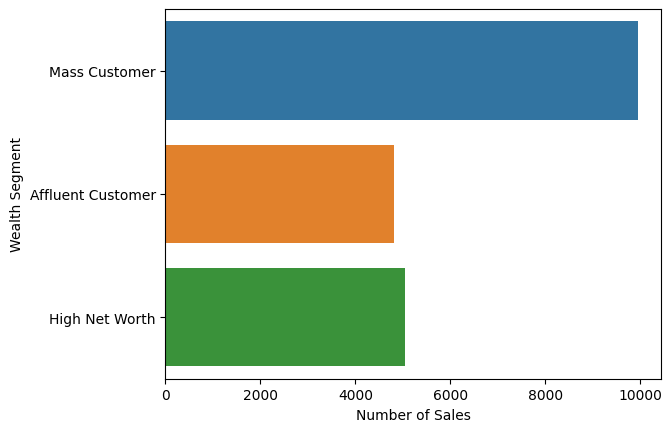

In [21]:
# visualize number of sales according to customer wealth segment
ax=ax=sns.barplot(x='transaction_id', y='wealth_segment', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Wealth Segment', xlabel='Number of Sales')

[Text(0, 0.5, 'Job Industry'), Text(0.5, 0, 'Number of Sales')]

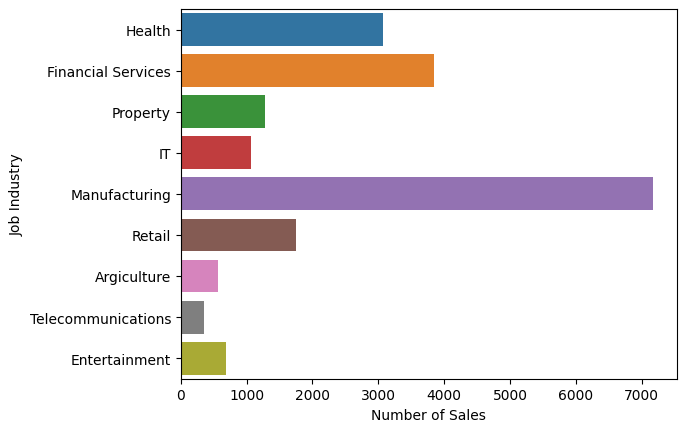

In [22]:
# visualize number of sales according to customer job industry
ax=sns.barplot(x='transaction_id', y='job_industry_category', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Job Industry', xlabel='Number of Sales') 

[Text(0, 0.5, 'Address Remoteness'), Text(0.5, 0, 'Number of Sales')]

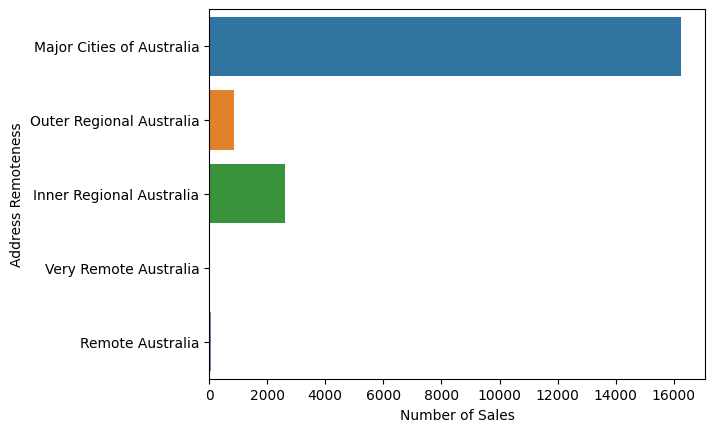

In [23]:
# visualize number of sales according to  incustomer address remoteness
ax=sns.barplot(x='transaction_id', y='remoteness_area', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Address Remoteness', xlabel='Number of Sales') 

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, 'customer owns a car')]

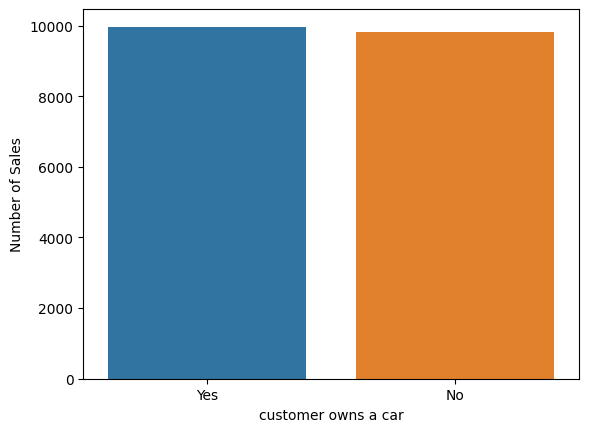

In [24]:
# visualize number of sales according to customer who owns a car
ax=sns.barplot(x='owns_car', y='transaction_id', data=transaction_df, estimator='count_nonzero')
ax.set(ylabel='Number of Sales', xlabel='customer owns a car') 

[Text(0, 0.5, 'Number of Sales'), Text(0.5, 0, "Customer's Tenures")]

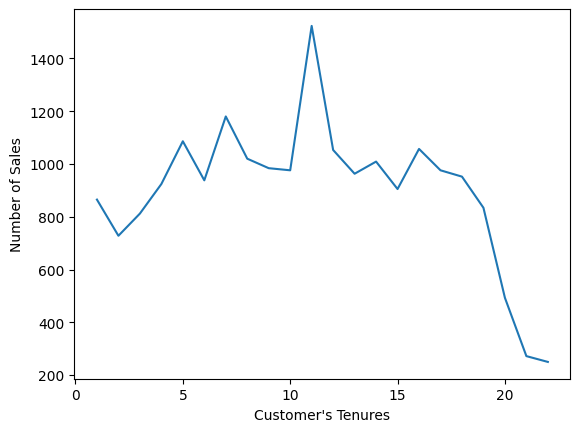

In [25]:
# visualize number sales according to customer tenure
ax=transaction_df.groupby('tenure').transaction_id.count().plot(kind='line')
ax.set(ylabel='Number of Sales', xlabel="Customer's Tenures")

[Text(0, 0.5, 'Number of Sales'),
 Text(0.5, 0, "Customer's Property Valuation")]

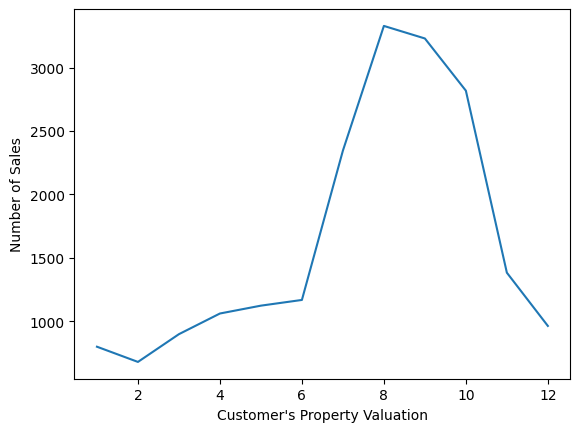

In [26]:
# visualize number sales according to customer property valuation
ax=transaction_df.groupby('property_valuation').transaction_id.count().plot(kind='line')
ax.set(ylabel='Number of Sales', xlabel="Customer's Property Valuation")

## **FEATURES SELECTION AND DATA STANDARDIZATION**

In [30]:
# Importing split package
from sklearn.model_selection import train_test_split  

# Import package for Onehot Encoding
from sklearn.preprocessing import LabelEncoder

In [31]:
# display the columns name and select the variables for correlation analysis
print(transaction_df.columns,'\n')
print(newcustomer_df.columns)

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'age',
       'age_group', 'job_industry_category', 'wealth_segment', 'owns_car',
       'tenure', 'postcode', 'remoteness_area', 'state', 'property_valuation',
       'product_id', 'transaction_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'profit',
       'product_first_sold_date', 'product_age'],
      dtype='object') 

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'age_group',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'remoteness_area', 'state', 'country', 'property_valuation', 'Rank',
       'Value'],
      dtype='object')


In [63]:
# Drop redundant columns
train_df = transaction_df.drop(['customer_id','product_id', 'transaction_id', 
                                'transaction_date', 'online_order','order_status', 
                                'product_class','product_size', 'list_price', 
                                'standard_cost', 'product_first_sold_date', 
                                'product_age', 'age_group','remoteness_area'], axis=1)

test_df = newcustomer_df.drop(['first_name', 'last_name', 'DOB', 'job_title', 
                               'deceased_indicator', 'address', 'country', 'Rank',
                               'Value', 'age_group','remoteness_area'], axis=1)

Convert Categorical Values to Numeric in Transaction and New Customer List Datasets

In [64]:
# transaction data: encode loyalty categorical values to numeric

le_gender = LabelEncoder()
le_gender.fit(['Female', 'Male', 'Undisclosed'])
train_df['gender'] = le_gender.transform(train_df['gender']) 

#le_age = LabelEncoder()
#le_age.fit(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70above'])
#train_df['age_group']= le_age.transform(train_df['age_group'])

le_industry = LabelEncoder()
le_industry.fit(['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Argiculture','Telecommunications'])
train_df['job_industry_category'] = le_industry.transform(train_df['job_industry_category']) 

le_wealth = LabelEncoder()
le_wealth.fit(['Mass Customer','High Net Worth','Affluent Customer'])
train_df['wealth_segment'] = le_wealth.transform(train_df['wealth_segment']) 

le_car = LabelEncoder()
le_car.fit(['Yes', 'No'])
train_df['owns_car'] = le_car.transform(train_df['owns_car']) 

#le_remoteness = LabelEncoder()
#le_remoteness.fit(['Major Cities of Australia','Inner Regional Australia','Outer Regional Australia','Remote Australia', 'Very Remote Australia'])
#train_df['remoteness_area'] = le_remoteness.transform(train_df['remoteness_area']) 

le_state = LabelEncoder()
le_state.fit(['NSW','VIC','QLD'])
train_df['state'] = le_state.transform(train_df['state']) 

train_df.head()

,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,brand,product_line,profit
0,0,93,70,3,2,1,11.0,2016.0,0,10.0,Norco Bicycles,Standard,90.10
1,0,93,70,3,2,1,11.0,2016.0,0,10.0,Giant Bicycles,Standard,431.33
2,0,93,70,3,2,1,11.0,2016.0,0,10.0,Giant Bicycles,Standard,57.73
3,0,93,70,3,2,1,11.0,2016.0,0,10.0,Norco Bicycles,Mountain,75.75
4,0,93,70,3,2,1,11.0,2016.0,0,10.0,Solex,Standard,17.87


In [65]:
# test data: encode loyalty categorical values to numeric

le_gender = LabelEncoder()
le_gender.fit(['Female', 'Male', 'Undisclosed'])
test_df['gender'] = le_gender.transform(test_df['gender']) 

#le_age = LabelEncoder()
#le_age.fit(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70above'])
#test_df['age_group']= le_age.transform(test_df['age_group'])

le_industry = LabelEncoder()
le_industry.fit(['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Argiculture','Telecommunications'])
test_df['job_industry_category'] = le_industry.transform(test_df['job_industry_category']) 

le_wealth = LabelEncoder()
le_wealth.fit(['Mass Customer','High Net Worth','Affluent Customer'])
test_df['wealth_segment'] = le_wealth.transform(test_df['wealth_segment']) 

le_car = LabelEncoder()
le_car.fit(['Yes', 'No'])
test_df['owns_car'] = le_car.transform(test_df['owns_car']) 

#le_remoteness = LabelEncoder()
#le_remoteness.fit(['Major Cities of Australia','Inner Regional Australia','Outer Regional Australia','Remote Australia', 'Very Remote Australia'])
#test_df['remoteness_area'] = le_remoteness.transform(test_df['remoteness_area']) 

le_state = LabelEncoder()
le_state.fit(['NSW','VIC','QLD'])
test_df['state'] = le_state.transform(test_df['state']) 

test_df.head()

,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation
0,1,82,40,3,1,1,5,2168,0,8
1,0,48,60,3,0,1,14,4207,1,4
2,1,33,37,0,0,0,13,3805,2,7
3,1,46,79,2,1,1,13,4305,1,4
4,0,39,45,5,0,1,9,2261,0,7


### **Features(X) and Target(y) Selection**

In [66]:
# select X and y and standardize X
train_X = train_df.drop(['brand','product_line','profit'], axis=1)
train_y = train_df['product_line']

### **Data Stardardization**

In [67]:
# import data scaling package
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train=scaler.fit_transform(train_X)

### **Data Split**

In [68]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X_train, train_y, test_size=0.3, random_state=100)  

print("Number of X train samples:",X_train.shape[0], "and number of X test samples :", X_test.shape[0])
print("Number of y train samples:",y_train.shape[0], "and number of y test samples :", y_test.shape[0])

Number of X train samples: 13860 and number of X test samples : 5940
Number of y train samples: 13860 and number of y test samples : 5940


## **MODEL BUILDING AND ACCURACY EVALUATION**

In [69]:
# import hyperparameters tuning package
from sklearn.model_selection import GridSearchCV



# import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,\
                            mean_squared_error, r2_score

### **LOGISTICS REGRESSION**

In [70]:
# import logistics regression package 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### **Logistics Regression Hyperparameters Tuning With GridSearch**

In [73]:
# define hyparameters for logistic regression

hyperparameters = {'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                  'C': [0.01, 0.1, 1.0]
                  }
GS_LR = GridSearchCV(LR, hyperparameters, cv=5)

In [74]:
# fitting the data
GS_LR.fit(X_train, y_train)

# display best hyparameters for logistic regression
best_LR = GS_LR.best_estimator_
print(GS_LR.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_LR = best_LR.predict(X_test)

print('Predicted y values:   ', y_pred_LR[0:5])
print('Actual y test values: ', y_test[0:5].values)

{'C': 0.01, 'solver': 'liblinear'} 

Predicted y values:    ['Standard' 'Standard' 'Standard' 'Standard' 'Standard']
Actual y test values:  ['Standard' 'Standard' 'Standard' 'Standard' 'Road']


### **Logistic Regression Model Accuracy Evaluation**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Mountain       0.00      0.00      0.00       142
        Road       0.00      0.00      0.00      1162
    Standard       0.71      1.00      0.83      4247
     Touring       0.00      0.00      0.00       389

    accuracy                           0.71      5940
   macro avg       0.18      0.25      0.21      5940
weighted avg       0.51      0.71      0.60      5940

f1 score: 0.6


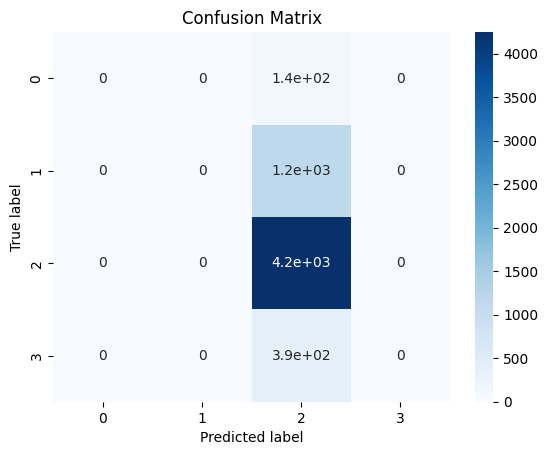

In [75]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_LR))

# modelaccuracy score: f1-score
F1_LR = f1_score(y_test, y_pred_LR, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_LR)

### **Importance of Each Feature in the Logistic Regression Model**

In [78]:
# Calculate feature importance using permutation importance
result = permutation_importance(best_LR, X_train, y_train)

# Map feature importance values to feature names
feature_names = train_X.columns
feature_importances = pd.Series(abs(result.importances_mean.round(4)), index=feature_names)

# Print the feature importance values
feature_importances = feature_importances.sort_values(ascending=True)

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance bar chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

NameError: ignored

wealth_segment                         0.044842
state                                  0.036612
owns_car                               0.033516
property_valuation                     0.032387
job_industry_category                  0.024675
postcode                               0.023628
age                                    0.021850
gender                                 0.018053
past_3_years_bike_related_purchases    0.010581
tenure                                 0.004014
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

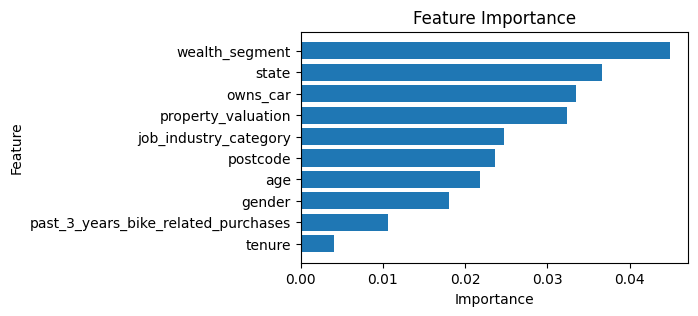

In [76]:
# Map feature importance values to feature names
feature_names = train_X.columns
feature_importances = pd.Series(abs(best_LR.coef_[0]), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **RANDOM FOREST**

In [55]:
# import support random forest classifier package 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

### **Random Forest Hyperparameters Tuning With GridSearch**

In [56]:
# define hyparameters for random forest classifier

hyperparameters = {'n_estimators': list(range(50,100,10)),
                   'max_depth': list(range(10,20,1))
                  }
GS_RF = GridSearchCV(RF, hyperparameters, cv=5)

In [57]:
# fitting the data
GS_RF.fit(X_train, y_train)

# display best hyparameters for random forest classifier
best_RF = GS_RF.best_estimator_
print(best_RF, '\n') 

# predicting the test data with the best hyperparameters
y_pred_RF = GS_RF.predict(X_test)

print('Predicted y values:   ', y_pred_RF[0:7])
print('Actual y test values: ', y_test[0:7].values)

RandomForestClassifier(max_depth=10, n_estimators=90) 

Predicted y values:    ['Standard' 'Standard' 'Standard' 'Standard' 'Standard' 'Standard'
 'Standard']
Actual y test values:  ['Standard' 'Standard' 'Standard' 'Standard' 'Road' 'Road' 'Road']


### **Random Forest Classifier Accuracy Evaluation**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Mountain       0.00      0.00      0.00       142
        Road       0.29      0.00      0.00      1162
    Standard       0.72      1.00      0.83      4247
     Touring       0.00      0.00      0.00       389

    accuracy                           0.71      5940
   macro avg       0.25      0.25      0.21      5940
weighted avg       0.57      0.71      0.60      5940

f1 score: 0.6


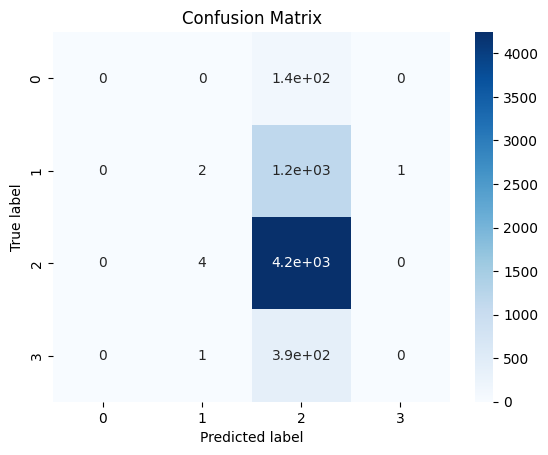

In [58]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_RF))

# modelaccuracy score: f1-score
F1_RF = f1_score(y_test, y_pred_RF, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_RF)

### **Importance of Each Feature in the Random Forest Model**

past_3_years_bike_related_purchases         0.179084
age                                         0.160771
property_valuation                          0.137532
tenure                                      0.123664
postcode                                    0.099524
wealth_segment_Mass Customer                0.022759
gender_Female                               0.021279
gender_Male                                 0.021081
wealth_segment_High Net Worth               0.021019
owns_car_Yes                                0.020516
wealth_segment_Affluent Customer            0.019976
owns_car_No                                 0.018112
job_industry_category_Health                0.015711
job_industry_category_Financial Services    0.015311
state_VIC                                   0.014285
job_industry_category_Manufacturing         0.014046
job_industry_category_Retail                0.013814
state_NSW                                   0.012861
job_industry_category_Property              0.

Text(0.5, 1.0, 'Feature Importance')

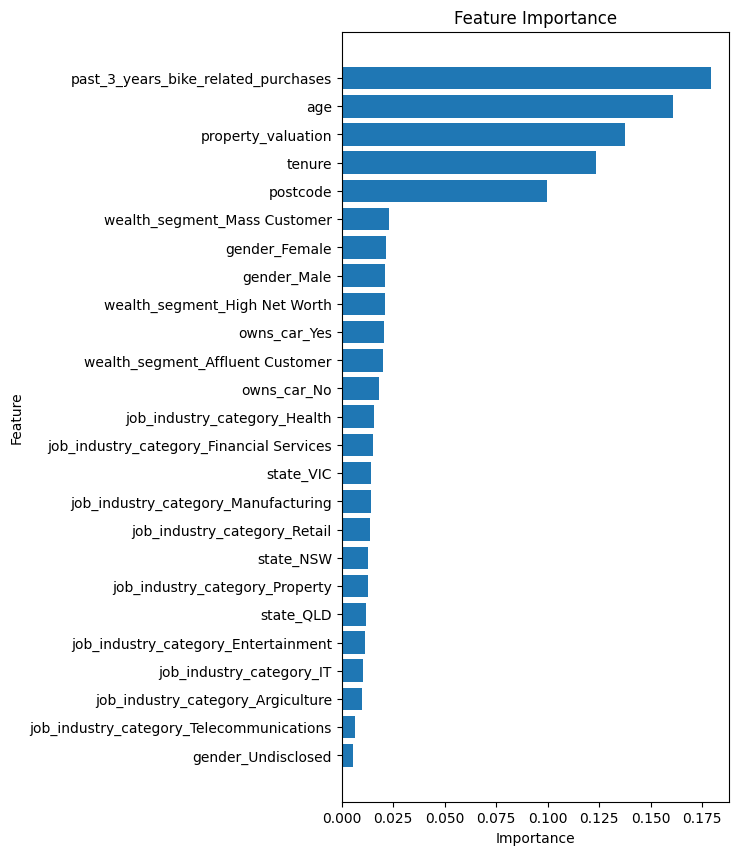

In [59]:
# Map feature importance values to feature names
feature_names = train_X.columns
feature_importances = pd.Series(abs(best_RF.feature_importances_), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

## **XGBoost** 

In [ ]:
# import XGB regressor package 
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()

In [ ]:
# define hyparameters for XGB regressor

hyperparameters = {'n_estimators': list(range(50,200,50)),
                   'max_depth': list(range(5,20,5))
                  }
GS_XGB = GridSearchCV(XGB, hyperparameters, cv=5)

In [ ]:
GS_XGB.fit(X_train, y_train)

# display best hyparameters for random forest classifier
best_XGB = GS_XGB.best_estimator_
print(GS_XGB.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_XGB = best_XGB.predict(X_test)

print('Predicted y values:   ', y_pred_XGB[0:10].round())
print('Actual y test values: ', y_test[0:10].values)

In [ ]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_XGB))

# modelaccuracy score: f1-score and jaccard score
F1_XGB = f1_score(y_test, y_pred_XGB, average='weighted').round(2)
#J_ANN = jaccard_score(y_test, y_pred_ANN).round(2)

# print model accuracy scores
print('f1 score:', F1_XGB)
#print('jaccard score:', J_ANN,'\n')

### **Features Importance in the XGBoost Model**

In [ ]:
# Map feature importance values to feature names
feature_names = train_X.columns
feature_importances = pd.Series(abs(best_XGB.feature_importances_), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

## **MODELS ACCURACY REPORT**

In [ ]:
# Models accuracy report

metrics = [['Logistic Regression', F1_LR], 
           ['Random Forest', F1_RF],
           ['XGBoost', F1_XGB]]

metrics_df = pd.DataFrame(metrics, columns = ['Algorithm','F1-score']).round(2)
metrics_df.set_index('Algorithm', inplace =  True)
metrics_df.sort_values('F1-score', ascending=False, inplace=True)

metrics_df